# Empirical copula density
<br />

Shanshan Wang <br />
shanshan.wang@uni-due.de <br />
Nov. 12, 2021

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as ss

## Sampling two correlated time series

In [2]:
mean = (1, 2)
cov = [[1, 1], [1, 2]] # diagonal covariance
val=np.random.multivariate_normal(mean,cov,10000)
print(np.corrcoef(val.T))

[[1.         0.71282499]
 [0.71282499 1.        ]]


In [3]:
print(np.cov(val.T))

[[1.0077827  1.01917341]
 [1.01917341 2.02844597]]


In [4]:
x0=val[:,0].T
y0=val[:,1].T
x=x0.tolist()
y=y0.tolist()
z=pd.DataFrame(list(zip(x,y)),columns=['x','y'])
z.head()

,x,y
0,0.315415,0.157473
1,0.405986,1.766039
2,2.270067,3.332233
3,0.090940,0.151011
4,0.893897,2.590805


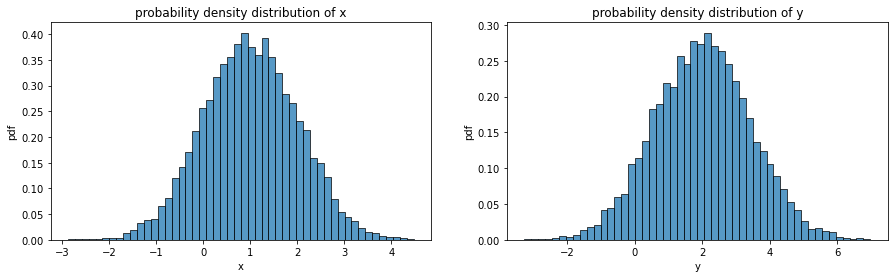

In [5]:
# histograms of the data
n_bins=50
fig, axes=plt.subplots(1,2, figsize=(15,4)) 
sns.histplot(data=x, bins=n_bins,ax=axes[0],stat='density').set(title='probability density distribution of x',
                                                            xlabel='x',ylabel='pdf')
sns.histplot(data=y, bins=n_bins,ax=axes[1],stat='density').set(title='probability density distribution of y',
                                                            xlabel='y',ylabel='pdf')
plt.show()


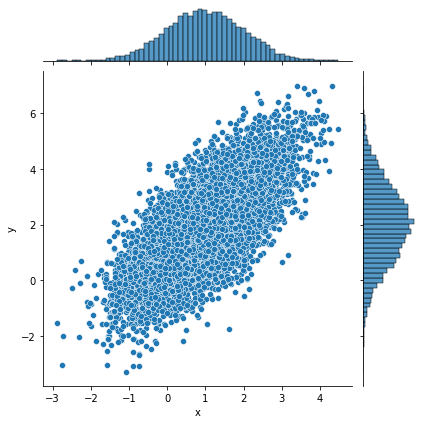

In [6]:
# joint distribution of x and y
sns.jointplot(data=z, kind="scatter", x="x", y="y")

## Ranking of data

In [7]:
# for example
a=[0.6,1,0.3,2,-0.5, 0.6]
rank=ss.rankdata(a)
quantile=(rank-0.5)/len(a)
print(rank,quantile)

[3.5 5.  2.  6.  1.  3.5] [0.5        0.75       0.25       0.91666667 0.08333333 0.5       ]


In [8]:
# quantiles of ranks of variables x and y
rx=ss.rankdata(x)
ry=ss.rankdata(y)
qx=(rx-0.5)/len(x)
qy=(ry-0.5)/len(y)

## Estimating a copula density for empirical data
It can be summarized as follows: make a 2d-histogram of the normalized quantiles of empirical data

In [9]:
# with density =True, normalize quantiles qx and qy
nx=30 # number of bins for qx
ny=30 # number of bins for qy
xmin=0 
xmax=1
ymin=0 
ymax=1
cop_dens_emp=np.histogram2d(qx, qy, bins=(nx, ny), range=[[xmin, xmax], [ymin, ymax]], density=True)

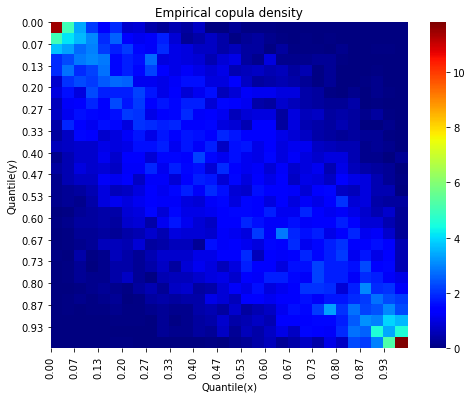

In [10]:
# draw matrix of cop_dens_emp in a heatmap
fig=plt.figure(figsize=(8,6))
xticklist=range(0,nx,2)
xticklabels=[format(xt/nx,'.2f') for xt in xticklist]
yticklist=range(0,ny,2)
yticklabels=[format(yt/ny,'.2f') for yt in yticklist]
sns.heatmap(cop_dens_emp[0],cmap='jet').set(title='Empirical copula density',
                                            xlabel='Quantile(x)',ylabel='Quantile(y)',
                                            xticks=xticklist,yticks=yticklist,
                                            xticklabels=xticklabels, yticklabels=yticklabels);


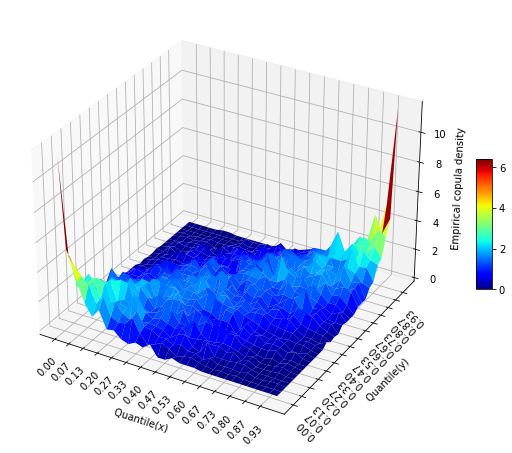

In [11]:
# draw the empirical copula density in a surface plot
X, Y = np.meshgrid(range(nx), range(ny)) 
fig = plt.figure(figsize=(12,8))
ax = plt.axes(projection='3d')
mycmap = plt.get_cmap('jet')
surf1=ax.plot_surface(X, Y, cop_dens_emp[0], cmap = mycmap)
xticklist=range(0,nx,2)
xticklabels=[format(xt/nx,'.2f') for xt in xticklist]
yticklist=range(0,ny,2)
yticklabels=[format(yt/ny,'.2f') for yt in yticklist]
plt.xlabel('\n\n Quantile(x)')
plt.ylabel('\n\n Quantile(y)')
ax.set_zlabel('Empirical copula density')
plt.xticks(xticklist,xticklabels,rotation=45)
plt.yticks(yticklist,yticklabels,rotation=135)
fig.colorbar(surf1, ax=ax, shrink=0.3, aspect=8)

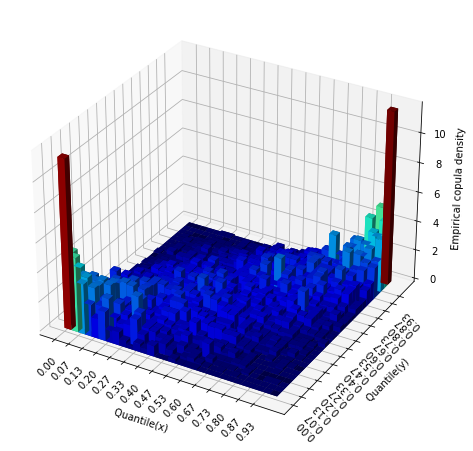

In [12]:
# draw copula density in 3-dimensional bar chart
# Construct arrays for the anchor positions of the nx*ny bars.
xpos, ypos = np.meshgrid(range(nx), range(ny)) 
xpos = xpos.ravel()
ypos = ypos.ravel()
zpos = 0

# Construct arrays with the dimensions for the nx*ny bars.
dx = dy = 1 * np.ones_like(zpos)
dz = cop_dens_emp[0].ravel()

fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(projection='3d')
colors = plt.cm.jet(cop_dens_emp[0].flatten()/float(cop_dens_emp[0].max()))
ax.bar3d(xpos, ypos, zpos, dx, dy, dz, zsort='average', color=colors)
xticklist=range(0,nx,2)
xticklabels=[format(xt/nx,'.2f') for xt in xticklist]
yticklist=range(0,ny,2)
yticklabels=[format(yt/ny,'.2f') for yt in yticklist]
ax.set_zlabel('Empirical copula density')
plt.xlabel('\n\n Quantile(x)')
plt.ylabel('\n\n Quantile(y)')
plt.xticks(xticklist,xticklabels,rotation=45)
plt.yticks(yticklist,yticklabels,rotation=135)

plt.show()